## Бустинг

In [166]:
import pandas as pd

df = pd.read_csv("ds_salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [ ]:
from sklearn.model_selection import train_test_split

target = "salary_in_usd"
leak = "salary"
df = df.dropna()
X = df.drop([target, leak], axis=1)
y = df[[target]]
X.head()

,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,EUR,ES,100,ES,L
1,2023,MI,CT,ML Engineer,USD,US,100,US,S
2,2023,MI,CT,ML Engineer,USD,US,100,US,S
3,2023,SE,FT,Data Scientist,USD,CA,100,CA,M
4,2023,SE,FT,Data Scientist,USD,CA,100,CA,M


In [168]:
y.head()

,salary_in_usd
0,85847
1,30000
2,25500
3,175000
4,120000


In [169]:
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X, y, test_size=0.2, random_state=42)
X_test_raw, X_train_val_raw, y_test_raw, y_train_val_raw = train_test_split(X_test_raw, y_test_raw, test_size=0.5, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, root_mean_squared_error
from sklearn.preprocessing import OneHotEncoder

categorical_features = X.select_dtypes(include=["object"]).columns

encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(X[categorical_features])

encoded_X_train = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_features))

X_encoded = pd.concat([X, encoded_X_train], axis=1)

X_encoded.drop(categorical_features, axis=1, inplace=True)

X_encoded

,work_year,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,...,company_location_SI,company_location_SK,company_location_TH,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_L,company_size_M,company_size_S
0,2023,100,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2023,100,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2023,100,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2023,100,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2023,100,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,100,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3751,2021,100,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3752,2020,100,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3753,2020,100,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [171]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
X_test, X_train_val, y_test, y_train_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [172]:
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

y_test_pred = lin_reg.predict(X_test)

In [173]:
mape = mean_absolute_percentage_error(y_test, y_test_pred)
rmse = root_mean_squared_error(y_test, y_test_pred)

print('MAPE: ', mape )
print('RMSE: ', rmse )

MAPE:  3072654.002852673
RMSE:  324194790891.74115


## XGboost

In [ ]:
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import root_mean_squared_error

params = {
    'max_depth': 8,
    'learning_rate': 0.01,
    'n_estimators': 800,
    'gamma': 0.2,
    'subsample': 0.6,
    'colsample_bytree': 1
}


xgb = XGBRegressor(**params, random_state=42)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_train_val)
mape = mean_absolute_percentage_error(y_train_val, y_pred)
rmse = root_mean_squared_error(y_train_val, y_pred)

print('MAPE: ', mape)
print('RMSE: ', rmse)

MAPE:  0.327985575144542
RMSE:  50391.761477106775


In [175]:
import time

start_time = time.time()
xgb.fit(X_train, y_train)
training_time = time.time() - start_time

start_time = time.time()
y_pred = xgb.predict(X_train_val)
prediction_time = time.time() - start_time

print(f"Время обучения: {training_time} секунд")
print(f"Время предсказания: {prediction_time} секунд")

Время обучения: 1.3206298351287842 секунд
Время предсказания: 0.02200174331665039 секунд


## CatBoost

In [ ]:
from catboost import CatBoostRegressor

params = {
    'depth' : 8,
    'learning_rate' : 0.01,
    'iterations' : 2000, 
    'l2_leaf_reg' : 1
}

cb = CatBoostRegressor(**params, verbose=0, random_state=42)

start_time = time.time()
cb.fit(X_train, y_train)
training_time = time.time() - start_time

start_time = time.time()
y_pred = cb.predict(X_train_val)
mape = mean_absolute_percentage_error(y_train_val, y_pred)
rmse = root_mean_squared_error(y_train_val, y_pred)
prediction_time = time.time() - start_time

print('MAPE: ', mape)
print('RMSE: ', rmse)

print(f"Время обучения: {training_time} секунд")
print(f"Время предсказания: {prediction_time} секунд")

MAPE:  0.33584512613761797
RMSE:  49866.51299928121
Время обучения: 5.502040863037109 секунд
Время предсказания: 0.00807046890258789 секунд


In [ ]:
from catboost import Pool

train_pool = Pool(data=X_train_raw, label=y_train_raw, cat_features=categorical_features.tolist())
val_pool = Pool(data=X_train_val_raw, label=y_train_val_raw, cat_features=categorical_features.tolist())

cb = CatBoostRegressor(**params, verbose=0, random_state=42)

start_time = time.time()
cb.fit(train_pool)
training_time = time.time() - start_time

start_time = time.time()
y_pred = cb.predict(val_pool)
mape = mean_absolute_percentage_error(y_train_val, y_pred)
rmse = root_mean_squared_error(y_train_val, y_pred)
prediction_time = time.time() - start_time

print('MAPE: ', mape)
print('RMSE: ', rmse)

print(f"Время обучения: {training_time} секунд")
print(f"Время предсказания: {prediction_time} секунд")

MAPE:  0.34184544847084997
RMSE:  49156.24069298833
Время обучения: 59.18935298919678 секунд
Время предсказания: 0.004016876220703125 секунд


## LightGBM

In [ ]:
from lightgbm import LGBMRegressor


params = {
    'max_depth' : 7, 
    'learning_rate' : 0.01, 
    'n_estimators' : 1000, 
    'min_child_samples' : 15
}

cb = LGBMRegressor(**params, verbose=-1, random_state=42)

start_time = time.time()
cb.fit(X_train, y_train)
training_time = time.time() - start_time

start_time = time.time()
y_pred = cb.predict(X_train_val)
mape = mean_absolute_percentage_error(y_train_val, y_pred)
rmse = root_mean_squared_error(y_train_val, y_pred)
prediction_time = time.time() - start_time

print('MAPE: ', mape)
print('RMSE: ', rmse)

print(f"Время обучения: {training_time} секунд")
print(f"Время предсказания: {prediction_time} секунд")

MAPE:  0.3136123378158581
RMSE:  48952.31278352092
Время обучения: 0.3399934768676758 секунд
Время предсказания: 0.006999969482421875 секунд


## Кластеризация

In [340]:
import pandas as pd
ratings = pd.read_excel("https://github.com/evgpat/edu_stepik_rec_sys/blob/main/datasets/sample_matrix.xlsx?raw=true", engine='openpyxl')
ratings.head()

,user,the beatles,radiohead,deathcab for cutie,coldplay,modest mouse,sufjan stevens,dylan. bob,red hot clili peppers,pink fluid,...,municipal waste,townes van zandt,curtis mayfield,jewel,lamb,michal w. smith,群星,agalloch,meshuggah,yellowcard
0,0,NaN,0.020417,NaN,NaN,NaN,NaN,NaN,0.030496,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,0.184962,0.024561,NaN,NaN,0.136341,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,0.028635,NaN,NaN,NaN,0.024559,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.043529,0.086281,0.034590,0.016712,0.015935,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ratings = ratings.T
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
user,0.000000,1.000000,2.000000,3.0,4.000000,5.000000,6.0,7.0,8.000000,9.000000,...,4990.000000,4991.0,4992.000000,4993.000000,4994.000000,4995.000000,4996.0,4997.000000,4998.0,4999.000000
the beatles,NaN,NaN,NaN,NaN,0.043529,NaN,NaN,NaN,0.093398,0.017621,...,NaN,NaN,0.121169,0.038168,0.007939,0.017884,NaN,0.076923,NaN,NaN
radiohead,0.020417,0.184962,NaN,NaN,0.086281,0.006322,NaN,NaN,NaN,0.019156,...,0.017735,NaN,NaN,NaN,0.011187,NaN,NaN,NaN,NaN,NaN
deathcab for cutie,NaN,0.024561,0.028635,NaN,0.034590,NaN,NaN,NaN,NaN,0.013349,...,0.121344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027893
coldplay,NaN,NaN,NaN,NaN,0.016712,NaN,NaN,NaN,NaN,NaN,...,0.217175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ratings.drop('user', axis=0, inplace=True)
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
the beatles,NaN,NaN,NaN,NaN,0.043529,NaN,NaN,NaN,0.093398,0.017621,...,NaN,NaN,0.121169,0.038168,0.007939,0.017884,NaN,0.076923,NaN,NaN
radiohead,0.020417,0.184962,NaN,NaN,0.086281,0.006322,NaN,NaN,NaN,0.019156,...,0.017735,NaN,NaN,NaN,0.011187,NaN,NaN,NaN,NaN,NaN
deathcab for cutie,NaN,0.024561,0.028635,NaN,0.034590,NaN,NaN,NaN,NaN,0.013349,...,0.121344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027893
coldplay,NaN,NaN,NaN,NaN,0.016712,NaN,NaN,NaN,NaN,NaN,...,0.217175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
modest mouse,NaN,NaN,NaN,NaN,0.015935,NaN,NaN,NaN,NaN,0.030437,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [343]:
ratings = ratings.fillna(0)
ratings

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
the beatles,0.000000,0.000000,0.000000,0.0,0.043529,0.000000,0.0,0.0,0.093398,0.017621,...,0.000000,0.0,0.121169,0.038168,0.007939,0.017884,0.0,0.076923,0.0,0.000000
radiohead,0.020417,0.184962,0.000000,0.0,0.086281,0.006322,0.0,0.0,0.000000,0.019156,...,0.017735,0.0,0.000000,0.000000,0.011187,0.000000,0.0,0.000000,0.0,0.000000
deathcab for cutie,0.000000,0.024561,0.028635,0.0,0.034590,0.000000,0.0,0.0,0.000000,0.013349,...,0.121344,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.027893
coldplay,0.000000,0.000000,0.000000,0.0,0.016712,0.000000,0.0,0.0,0.000000,0.000000,...,0.217175,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
modest mouse,0.000000,0.000000,0.000000,0.0,0.015935,0.000000,0.0,0.0,0.000000,0.030437,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
michal w. smith,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
群星,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
agalloch,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
meshuggah,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000


In [ ]:
ratings.sample()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
the apples in stereo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(ratings)

ratings['cluster'] = kmeans.labels_

In [324]:
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
the beatles,0.000000,0.000000,0.000000,0.0,0.043529,0.000000,0.0,0.0,0.093398,0.017621,...,0.000000,0.0,0.121169,0.038168,0.007939,0.017884,0.0,0.076923,0.0,0.000000
radiohead,0.020417,0.184962,0.000000,0.0,0.086281,0.006322,0.0,0.0,0.000000,0.019156,...,0.017735,0.0,0.000000,0.000000,0.011187,0.000000,0.0,0.000000,0.0,0.000000
deathcab for cutie,0.000000,0.024561,0.028635,0.0,0.034590,0.000000,0.0,0.0,0.000000,0.013349,...,0.121344,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.027893
coldplay,0.000000,0.000000,0.000000,0.0,0.016712,0.000000,0.0,0.0,0.000000,0.000000,...,0.217175,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
modest mouse,0.000000,0.000000,0.000000,0.0,0.015935,0.000000,0.0,0.0,0.000000,0.030437,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000


In [ ]:
import numpy as np
labels = pd.Series(kmeans.labels_)

ratings['cluster'].value_counts()

cluster
3    882
0    115
4      1
2      1
1      1
Name: count, dtype: int64

In [ ]:
single_element_clusters = ratings['cluster'].value_counts()[ratings['cluster'].value_counts() == 1].index
ratings[ratings['cluster'].isin(single_element_clusters)]

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,cluster
the beatles,0.0,0.0,0.0,0.0,0.043529,0.0,0.0,0.0,0.093398,0.017621,...,0.0,0.121169,0.038168,0.007939,0.017884,0.0,0.076923,0.0,0.0,4
niИ,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.012281,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,2
日dir en grey,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,1


In [ ]:
from sklearn.preprocessing import normalize

ratings_norm = normalize(ratings)

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(ratings_norm)

ratings['cluster'] = kmeans.labels_
ratings['cluster'].value_counts()

cluster
0    884
4     48
2     45
1     14
3      9
Name: count, dtype: int64

In [ ]:
from scipy.spatial.distance import cosine


centroids = kmeans.cluster_centers_

def top_n_artists_per_cluster(ratings, centroids, n=10):
    cluster_top_artists = {}
    
    for cluster_id in range(len(centroids)):
        centroid = centroids[cluster_id]
        distances = ratings.drop(columns=['cluster']).apply(lambda row: cosine(row, centroid), axis=1)
        ratings['distance'] = distances
        top_artists = ratings[ratings['cluster'] == cluster_id].sort_values(by='distance').head(n).index
        cluster_top_artists[cluster_id] = top_artists.tolist()
    
    return cluster_top_artists

top_artists = top_n_artists_per_cluster(ratings, centroids)

for cluster_id, artists in top_artists.items():
    print(f"Cluster {cluster_id}:")
    for artist in artists:
        print(f" - {artist}")

Cluster 0:
 - the quitters
 - jet
 - jenny lewis with the watson twins
 - dangerdoom
 - hawthorne heights
 - conor oberst
 - kasabian
 - eve 6
 - plus-44
 - m.i.a.*
Cluster 1:
 - kanye west
 - jay-z
 - nas
 - lil' wayne
 - lupe the gorilla
 - common
 - t.i.
 - outkast
 - eminem
 - the notorious b.i.g.
Cluster 2:
 - led zeppelin.
 - pink fluid
 - the rolling stones
 - dylan. bob
 - tool
 - who
 - divid bowie
 - sublime
 - ￼beastie boys
 - the gateful dead
Cluster 3:
 - iron maiden
 - judas priest
 - metallica
 - black sabbath
 - megadeth
 - opeth
 - in flames
 - the misfits
 - gunsnroses
Cluster 4:
 - radiohead
 - deathcab for cutie
 - coldplay
 - sufjan stevens
 - modest mouse
 - the killers
 - bright eyes
 - red hot clili peppers
 - elliotte smith
 - the shins


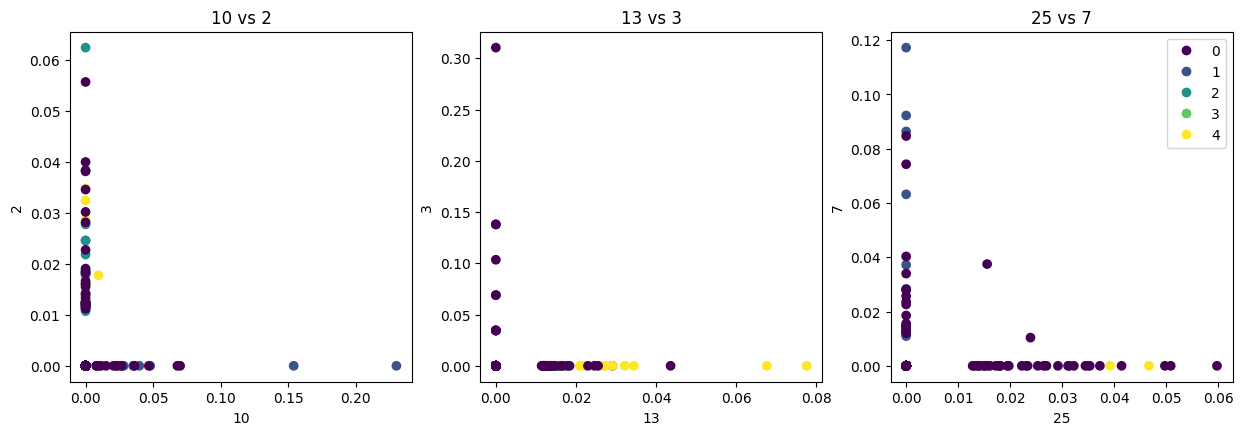

In [ ]:
import matplotlib.pyplot as plt

def plot_clusters(data, labels, feature_pairs):
    plt.figure(figsize=(15, 10))
    for i, (x_feature, y_feature) in enumerate(feature_pairs):
        plt.subplot(2, 3, i+1)
        scatter = plt.scatter(data[x_feature], data[y_feature], c=labels, cmap='viridis')
        plt.xlabel(x_feature)
        plt.ylabel(y_feature)
        plt.title(f'{x_feature} vs {y_feature}')
    
    plt.legend(handles=scatter.legend_elements()[0], labels=set(labels))
    plt.show()

feature_pairs = [(10, 2), (13, 3), (25, 7)]

plot_clusters(ratings, kmeans.labels_, feature_pairs)

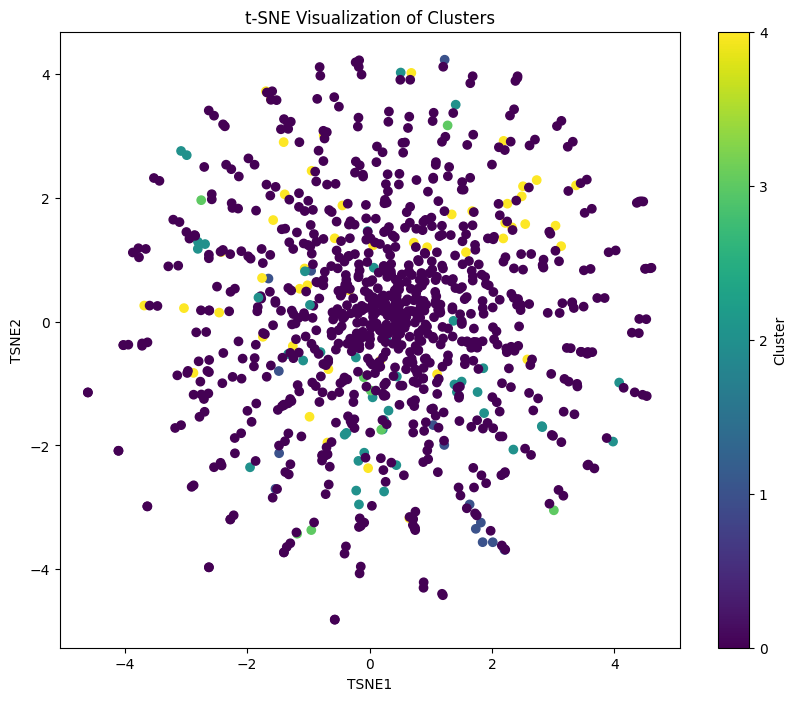

In [ ]:
from sklearn.manifold import TSNE

ratings.columns = ratings.columns.astype(str)
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(ratings.drop(columns=['cluster']))

tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['cluster'] = kmeans.labels_

plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c=tsne_df['cluster'], cmap='viridis')
plt.colorbar(scatter, ticks=range(5), label='Cluster')
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

ratings = pd.read_excel("https://github.com/evgpat/edu_stepik_rec_sys/blob/main/datasets/sample_matrix.xlsx?raw=true", engine='openpyxl')
ratings = ratings.T
ratings.drop('user', axis=0, inplace=True)
ratings = ratings.fillna(0)
silhouette_scores = []
range_n_clusters = range(2, 101)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(ratings)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(ratings, cluster_labels)
    silhouette_scores.append(silhouette_avg)

optimal_n_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f"Оптимальное количество кластеров: {optimal_n_clusters}")

Оптимальное количество кластеров: 3


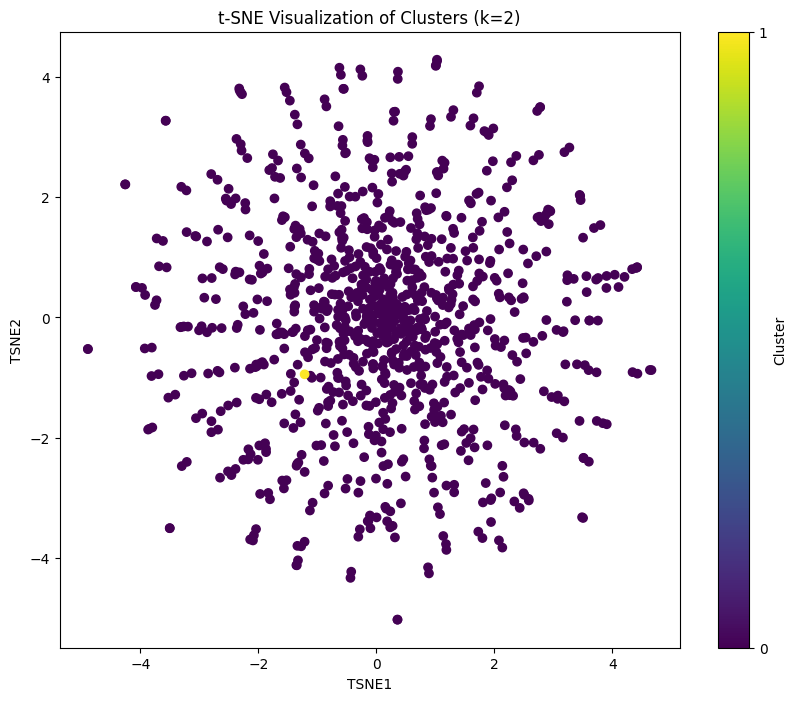

In [ ]:
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
kmeans.fit(ratings)
labels = kmeans.labels_
ratings['cluster'] = labels

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(ratings.drop(columns=['cluster']))

tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['cluster'] = labels

plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c=tsne_df['cluster'], cmap='viridis')
plt.colorbar(scatter, ticks=range(optimal_n_clusters), label='Cluster')
plt.title(f't-SNE Visualization of Clusters (k={optimal_n_clusters})')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()